# Laboratory II - Clustering
Machine Learning II

Edward Alejandro Giraldo Gallón

In [1]:
#Check the requirements file for modules compatibility

## Punto 1. Research about the Spectral Clustering method, and answer the following questions:

### a. In which cases might it be more useful to apply?

Los casos donde es mejor usar el clustering espectral es cuando los datos tienen patrones de diferentes formas y tamaños (alta dimensionalidad), recordemos que en la técnica del kmeans, a la hora de calcular un centroide se asume que la distribución de los datos tiene una forma circular, cuando la información no puede agruparse de esta forma requiere de un número mayor de iteraciones para ir encontrando cada vez los mejores centroides. A su vez, la información puede pertenecer a un mismo grupo, pero estar lo suficientemente espaciada como para que los métodos más convencionales lo tomen como parte de un clúster diferente.

El clustering espectral se suele utilizar en problemas de segmentación de imágenes, minería de datos educativos, resolución de entidades, separación de discursos.
Si bien el clustering espectral es una técnica basada en la teoría de grafos, este es usado en la identificaciones de comunicades de vértices de un grafo, basado en las esquinas que los conectan.

### b. What are the mathematical fundamentals of it?

Para un set de datos: ![Alt text](images/image-2.png)

Se puede encontrar grafo unidireccional G(V,E), donde el vertice vi respresenta xi.

Basado en el grafo unidireccional G, se puede construir un grafo ponderado de adyacencias : ![Alt text](images/image-3.png)

![Alt text](images/image-13.png)

Para obtener W primero se debe calcular la matriz de adyacencias atravez de e-vecinos, k-vecinos mas cercanos u otro metodo que conecte todos los vertices y luego se compitan los pesos en los bordes conectados mediante una función de similaridad. La función mas común es el kernel RBF, donde: ![Alt text](images/image-4.png)

Si wij es mayor que cero para todo par de vertices vi y vj, G se convierte en un grafo totalmente conectado donde cada vertice conecta con cada otro vertice.

Dada la matriz de adyacencia ponderada, el grado de la matriz (D) se define como la matriz diagonal donde:

![Alt text](images/image-5.png)

![Alt text](images/image-14.png)

Con la matriz W y D, se puede obtener la matriz Laplaciana de grafos sin normalizar, L=D-W

![Alt text](images/image-15.png)

Para facilidad del analisis la matriz Laplaciana de grafos se debe normalizar.

Con la matriz normalizada se requiere resolver la función objetivo: 

![Alt text](images/image-6.png)

Donde: 
![Alt text](images/image-9.png)

![Alt text](images/image-8.png)

![Alt text](images/image-7.png)

La solución a esta ecuación nos arroja los primeros valores propios k no constantes que conforman los clusters:

![Alt text](images/image-10.png)

![Alt text](images/image-11.png)

### c. What is the algorithm to compute it?

El algoritmo para implementar el clustering espectral sigue mas o menos los siguientes pasos:

![Alt text](images/image-12.png)

### d. Does it hold any relation to some of the concepts previously mentioned in class? Which, and how?

Si, de los conceptos que se relacionan en el clustering espectral, son:
- Datos de alta dimensionalidad: es un algoritmo enfocado a datos de alta dimensión, con el costo de que entre mayor el número de datos puede ser un algoritmo bastante pesado computacionalmente.
- Reducción de dimensiones: utiliza técnicas de reducción de dimensiones para construir los gráficos de baja dimensionales en los cuales se obtiene una similaridad entre puntos que pertenecen a un mismo clúster 
- Espacio de menor dimensión:  La información se transforma en elementos de menor dimensión a través del algebra lineal.
- Valores propios y vectores propios: Mediante la información que se obtiene de los valores propios y vectores propios es que se construyen las nociones de densidad en las gráficas, así como el número de clústeres
- KNN: se usa como una forma de crear los vértices en los elementos i y j que sean vecinos más cercanos, de tal forma que se creen los gráficos KNN.
- UMAP: ambos utilizan un gráfico de baja dimensionalidad para calcular la similaridad entre los puntos

## Punto 2. Research about the DBSCAN method, and answer the following questions

### a. In which cases might it be more useful to apply?

Los casos donde es mejor usar el clustering basado en densidad de aplicaciones con ruido es cuando los datos tienen formas arbitrarias, se tiene presencia de datos atipicos, algunos clusters parecen envueltos en otros y sobre todo si los datos estan muy juntos entre si (alta densidad), si bien es un metodo mas robusto, tiene el inconveniente de que es bastante mas sensible a los valores de los parametros que se le ingresa (epsilon y numero minimo de muestras).

El clustering por DBSCAN se suele utilizar en problemas de segmentación de imágenes, clustering de documentos, motores de recomendación, segmentación de mercados, agrupamiento de resultados de busqueda y detección de anomalias.
Es una de las tecnicas mas usadas en la literatura.

### b. What are the mathematical fundamentals of it?

El metodo DBSCAN tiene unos fundamentos matematicos sencillos, puesto que su estrategia se basa en generar puntos nucleo a partir de la identificación de un numero minimos de puntos cercanos al punto analizado bajo un radio dado.
Los parametros que guian el algoritmo son los siguientes:

- Epsilon (ε): Este es el parámetro de radio. DBSCAN busca puntos dentro de un radio ε de un punto central para formar un grupo.

- MinPts: Este es el número mínimo de puntos que deben estar dentro del radio ε para que un punto se considere parte de un grupo (punto núcleo).

A partir de los parametros anteriores, el metodo es capaz de identificar y clasificar los puntos de la sigueinte forma:

- Puntos núcleo (Core Points): Un punto se considera un punto núcleo si al menos MinPts puntos se encuentran dentro de un radio ε alrededor de él (incluyéndose a sí mismo).

- Puntos de borde (Border Points): Un punto se considera un punto de borde si no es un punto núcleo en sí mismo, pero está dentro del radio ε de un punto núcleo.

- Puntos de ruido (Noise Points): Los puntos que no son ni núcleos ni de borde se consideran puntos de ruido y no se agrupan.

Para generar los cluster el metodo DBSCAN sigue el sigueinte procesamiento

- El algoritmo DBSCAN comienza eligiendo un punto de datos aleatorio y verifica si es un punto núcleo. dist(X,Y)<= epsilon

![Alt text](images/image-20.png)

- Si es un punto núcleo, se forma un nuevo grupo y se exploran todos los puntos accesibles desde él (es decir, los puntos que están dentro de ε). Estos puntos también se agregan al grupo.

Luego, el algoritmo repite el proceso para cada punto recién agregado al grupo, explorando su vecindario y agregando nuevos puntos al grupo si son núcleos.

![Alt text](images/image-19.png)

Este proceso se repite hasta que no se pueden agregar más puntos al grupo actual.

El algoritmo luego selecciona otro punto no visitado aleatorio y repite el proceso hasta que todos los puntos se han visitado y asignado a grupos o se han marcado como puntos de ruido.

### c. Is there any relation between DBSCAN and Spectral Clustering? If so, what is it?

Entre el algotimo DBSCAN y el clustering espectral si se cuenta con una relación, en algunos textos llaman al DBSCAN como un semi cluster espectral o una relación trivial, si bien el DBSCAN esta mas orientado a la data como tal y no a una especie de representación de baja dimensión medianto grafos, el DBSCAN puede abordarse matematicamente como un problema de factorización de matrices y de grafos vecinos, donde los cluster que se pueden encontrar con excepción de los valores frontera y los puntos considerados como ruido, a valores optimos de los grafos de vecindad the los puntos nucleo, que corresponden a los cluster del metodo espectral.
Para ver mas sobre el tema se puede recurir a este documento https://ceur-ws.org/Vol-2191/paper38.pdf

## Punto 3. What is the elbow method in clustering? And which flaws does it pose to assess quality?

El metodo del codo, es un metodo que nos permite encontrar el numero optimo de clusters (k) en un algoritmo o técnica de clusterización. se basa en grafica la varianza explicada o la suma de los errores cuadraticos como función del numero de clusters, la idea con esta respresentación es encontrar el punto (codo - rodilla), donde el cambio en la varianza ya no es significativo, y por lo tanto, el aumentar el numero de clusters no nos proporciona un mejor modelamiento de los datos, se puede convertir en un sobre ajuste.

![Alt text](images/image-16.png)

La selección del numero de cluster mediante este metodo suele ser bastante ambiguo, ya que se basa mas en la experiencia del analista que un criterio mas exacto.
El metodo se ve perjudicado si se tienen varios clusters muy cercanos, puesto que el metodo al considerar las distancia puede tomar estos clusters como uno soloy obtener de esta forma un resultado incorrecto del numero de clusters

## Punto 4. Remember the unsupervised Python package you created in the previous unit?😀It’s time for an upgrade

### a. Implement the k-means module using Python and Numpy

In [2]:
from unsupervised import kmeans

### b. Implement the k-medoids module using Python and Numpy

In [3]:
from unsupervised import kmedoids

## Punto 5. Let’s use the newly created modules in unsupervised to cluster some toy data.

### a. Use the following code snippet to create scattered data X

In [4]:
#Required modules

#Dataset
from sklearn.datasets import make_blobs
#Math
import numpy as np
#Plot
import matplotlib.pyplot as plt


In [5]:
#Making the data
X, y, centers = make_blobs(
n_samples=500,
n_features=2,
centers=4,
cluster_std=1,
center_box=(-10.0, 10.0),
shuffle=True,
random_state=1,
return_centers=True
)

### b. Plot the resulting dataset. How many clusters are there? How far are they from one another?

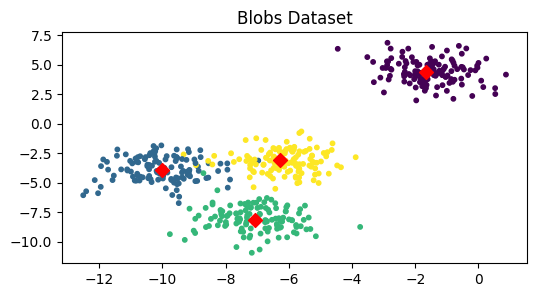

In [6]:
#Plotting the resulting dataset
plt.figure(figsize=(6,3))
plt.title('Blobs Dataset')
plt.scatter(X[:,0],X[:,1],s=10, c=y,cmap='viridis')
plt.scatter(*zip(*centers), s=50, marker='D', color='r')
plt.show()

In [7]:
#Functions for distance calculation
def euclidean_distance(p1,p2):
    # Calculate the Euclidean distance between two points
    return np.linalg.norm(p1 - p2)

def print_distance(name,centers):
    distances = {}
    for i in range(len(centers)):
        for j in range(i+1, len(centers)):
            point_i = tuple(np.round(centers[i],2))  
            point_j = tuple(np.round(centers[j],2))  
            distance = euclidean_distance(centers[i], centers[j])
            distances[f'Distance {point_i} to {point_j} is:'] = distance

    print(f'Individual distances for {name}:')
    for key, distance in distances.items():
        print(f"{key}: {round(distance,2)}")

In [8]:
#Using the unsupervised package
#Unsupervised kmeans
kmeans   = kmeans.kmeans()
#Unsupervised kmedoids
kmedoids = kmedoids.kmedoids()

In [9]:
#Return clusters by kmeans
loss_kmeans, mean_vector, k_index = kmeans.fit(X, 4, max_iter=100, abs_tol=1e-16, rel_tol=1e-16, printable=True)

iter 0, loss: 4178.8611
iter 1, loss: 2447.9265
iter 2, loss: 2276.7220
iter 3, loss: 1820.6534
iter 4, loss: 1017.1834
iter 5, loss: 910.5347
iter 6, loss: 908.3856


In [10]:
#Return clusters by kmedoids
loss_kmedoids, medoids, clusters = kmedoids.fit(X, 4, max_iter=100, abs_tol=1e-16, rel_tol=1e-16, printable=True)
#Check if medoids are elements of the Dataset
print(np.unique(np.in1d(X, medoids),return_counts=True))

iter 0, loss: 10459.1652
iter 1, loss: 6230.5448
iter 2, loss: 2354.9311
iter 3, loss: 1911.5155
iter 4, loss: 1874.7239
iter 5, loss: 1878.1176
iter 6, loss: 1876.2939
iter 7, loss: 1795.5428
iter 8, loss: 1319.8465
iter 9, loss: 915.3372
iter 10, loss: 909.2810
iter 11, loss: 909.1079
(array([False,  True]), array([996,   4], dtype=int64))


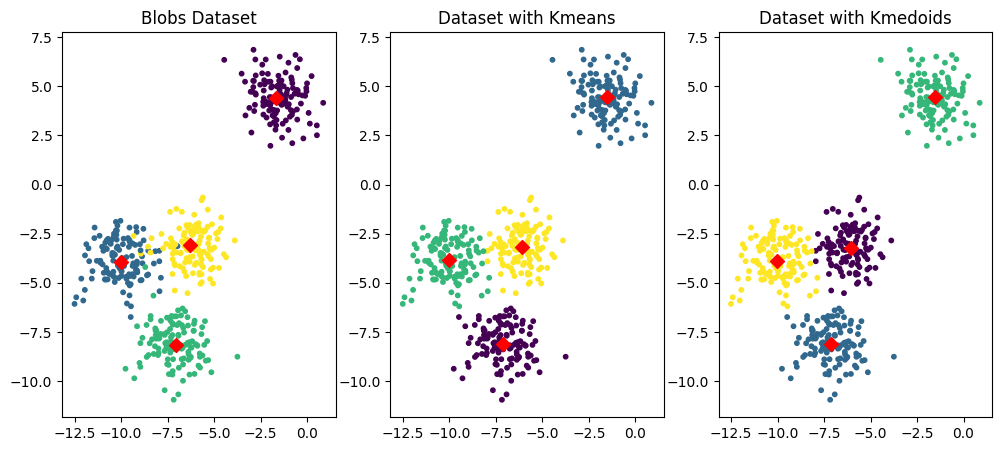

In [11]:
#Plotting the resulting dataset
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.title('Blobs Dataset')
plt.scatter(X[:,0],X[:,1], s=10,c=y,cmap='viridis')
plt.scatter(*zip(*centers), s=50, marker='D', color='r')

plt.subplot(1,3,2)
plt.title('Dataset with Kmeans')
plt.scatter(X[:,0],X[:,1], s=10,c=k_index,cmap='viridis')
plt.scatter(*zip(*mean_vector), s=50, marker='D', color='r')

plt.subplot(1,3,3)
plt.title('Dataset with Kmedoids')
plt.scatter(X[:,0],X[:,1], s=10,c=clusters,cmap='viridis')
plt.scatter(*zip(*medoids), s=50, marker='D', color='r')
plt.show()

In [12]:
print_distance('Original',centers)
print('\n')
print_distance('Kmeans',mean_vector)
print('\n')
print_distance('Kmedoids',medoids)
print('\n')

Individual distances for Original:
Distance (-1.66, 4.41) to (-10.0, -3.95) is:: 11.81
Distance (-1.66, 4.41) to (-7.06, -8.15) is:: 13.67
Distance (-1.66, 4.41) to (-6.27, -3.09) is:: 8.8
Distance (-10.0, -3.95) to (-7.06, -8.15) is:: 5.12
Distance (-10.0, -3.95) to (-6.27, -3.09) is:: 3.82
Distance (-7.06, -8.15) to (-6.27, -3.09) is:: 5.13


Individual distances for Kmeans:
Distance (-7.09, -8.11) to (-1.54, 4.44) is:: 13.72
Distance (-7.09, -8.11) to (-10.01, -3.85) is:: 5.16
Distance (-7.09, -8.11) to (-6.08, -3.17) is:: 5.04
Distance (-1.54, 4.44) to (-10.01, -3.85) is:: 11.85
Distance (-1.54, 4.44) to (-6.08, -3.17) is:: 8.86
Distance (-10.01, -3.85) to (-6.08, -3.17) is:: 3.98


Individual distances for Kmedoids:
Distance (-6.07, -3.21) to (-7.11, -8.12) is:: 5.02
Distance (-6.07, -3.21) to (-1.54, 4.45) is:: 8.9
Distance (-6.07, -3.21) to (-10.01, -3.91) is:: 4.0
Distance (-7.11, -8.12) to (-1.54, 4.45) is:: 13.75
Distance (-7.11, -8.12) to (-10.01, -3.91) is:: 5.11
Distance (

### c. For both k-means and k-medoids (your implementations), calculate the silhouette plots and coefficients for each run, iterating K from 1 to 5 clusters.

In [13]:
#Required modules
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

In [14]:
#Print sihouette function
def sihouette(method,X,array_nclusters,name):

    score = {}

    for n_clusters in array_nclusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(15, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        _, clusterer, k_index = method.fit(X, n_clusters, max_iter=100, abs_tol=1e-16, rel_tol=1e-16, printable=False)
        
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, k_index)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        score[str(n_clusters)] = silhouette_avg

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, k_index)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[k_index == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(k_index.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            f'Silhouette analysis with {name} on sample data with n_clusters = {n_clusters}',
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

    return score


In [15]:
#Number of clusters
range_n_clusters = [2, 3, 4, 5]

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.555806786741096


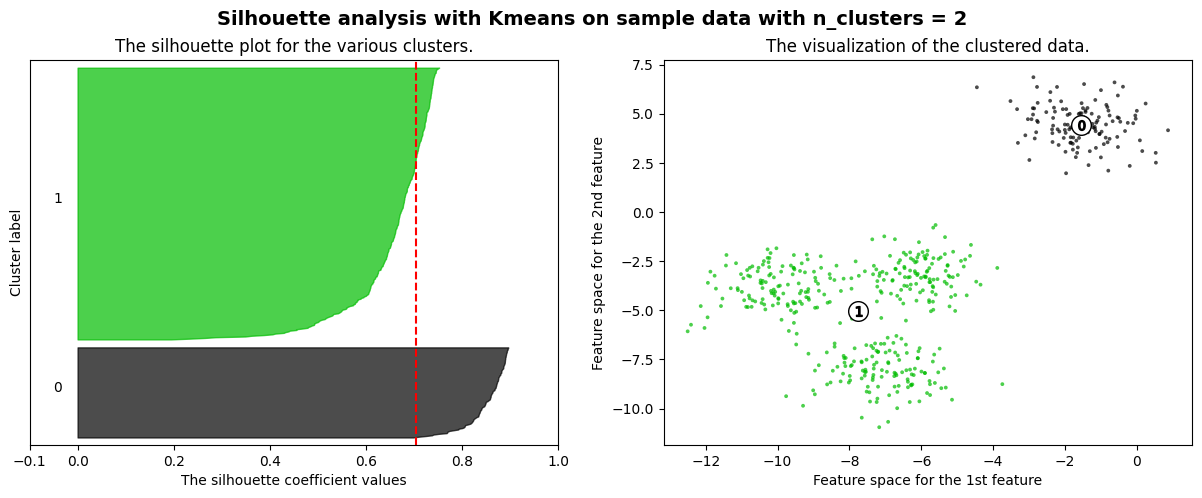

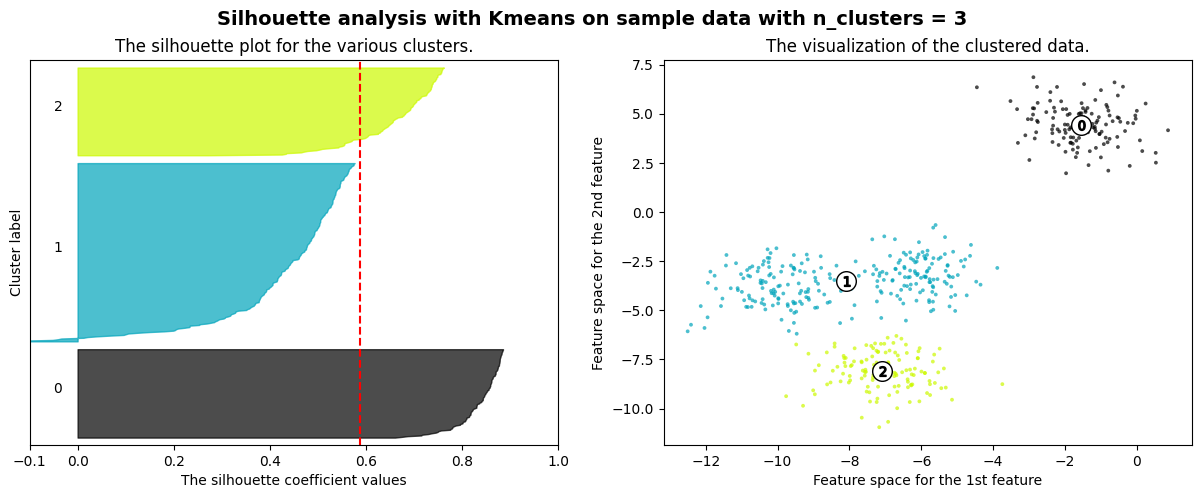

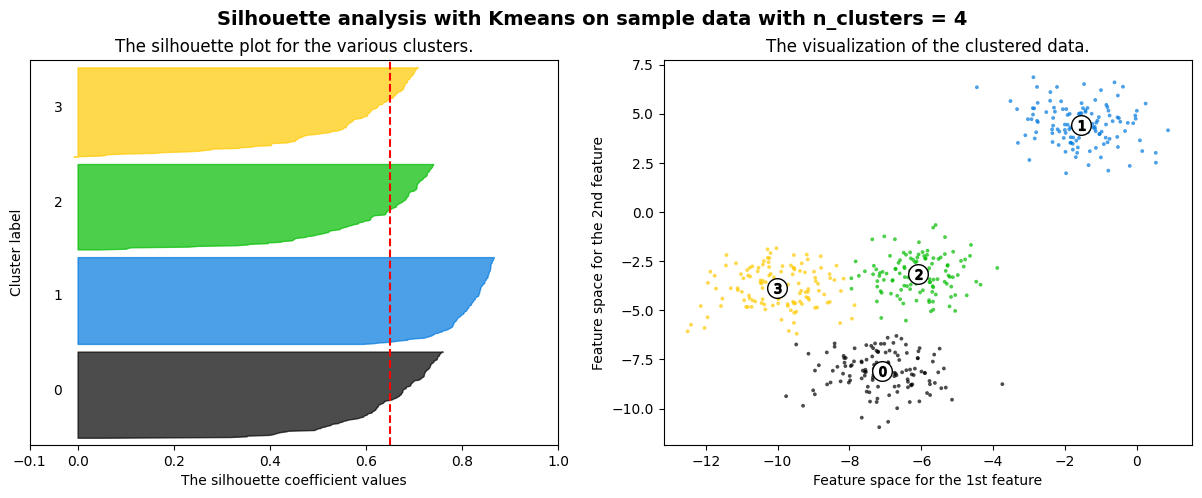

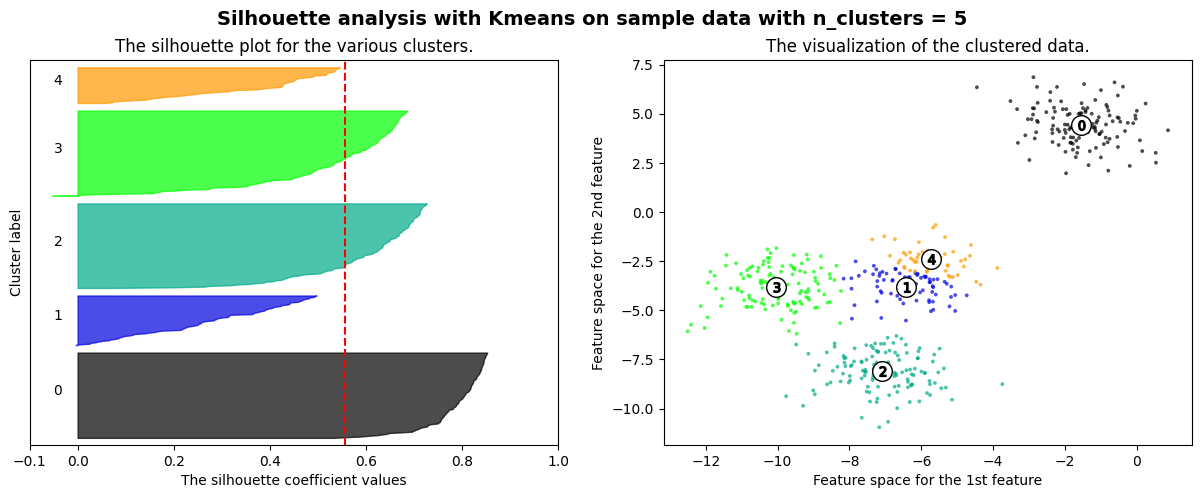

In [16]:
k_means_score = sihouette(kmeans,X,range_n_clusters,'Kmeans')

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5877684124250337
For n_clusters = 4 The average silhouette_score is : 0.4757400490529177
For n_clusters = 5 The average silhouette_score is : 0.5752158904019775


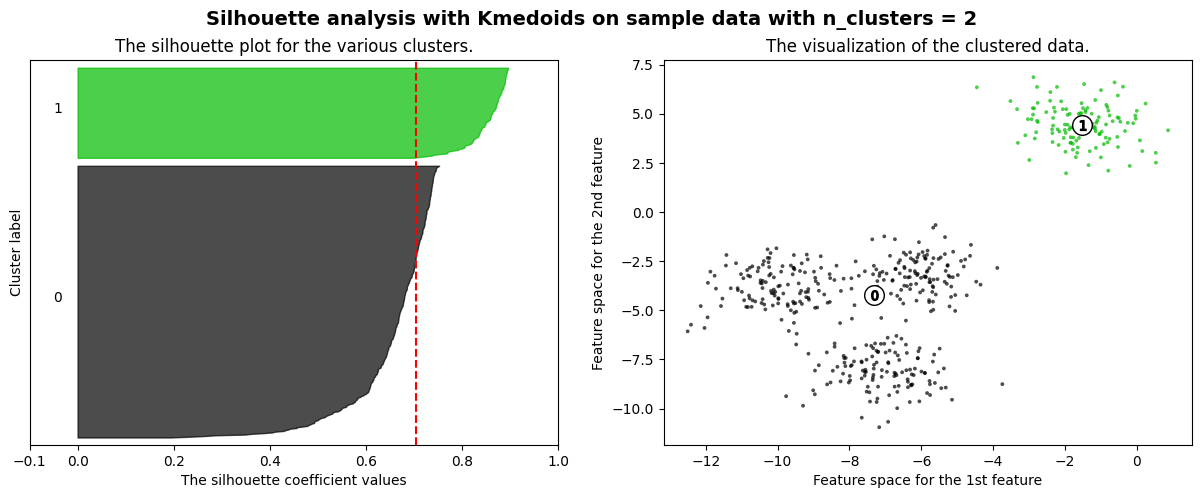

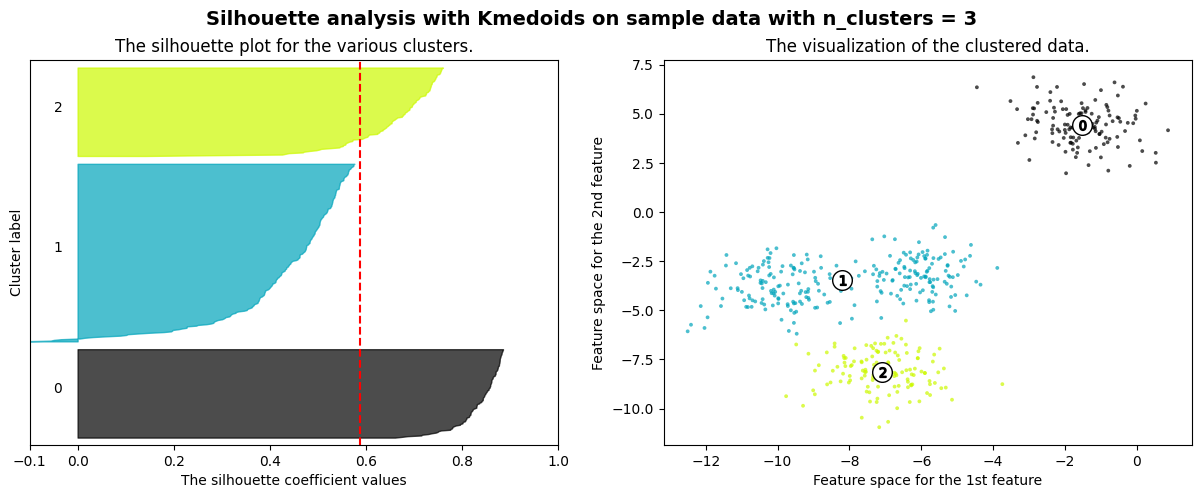

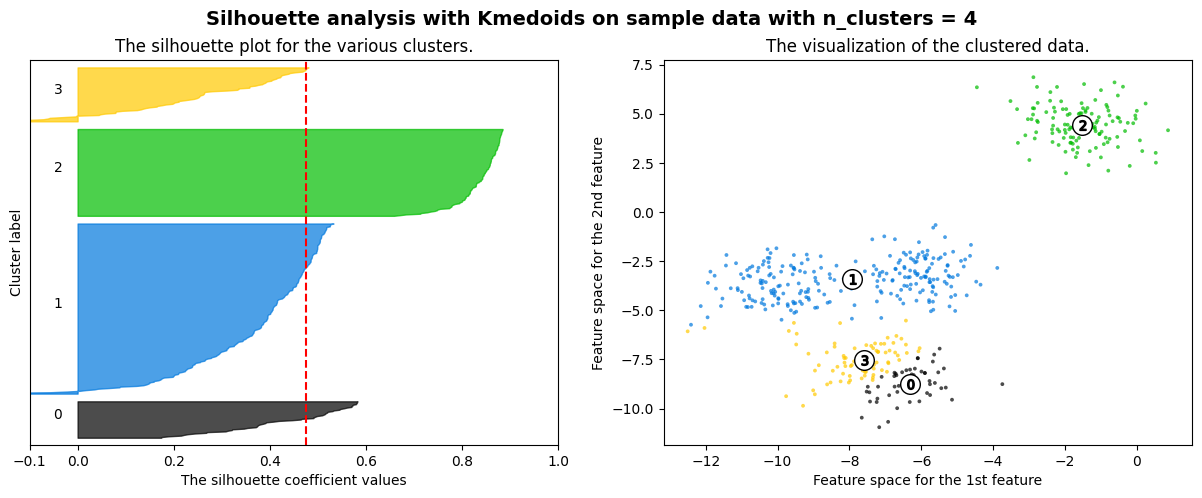

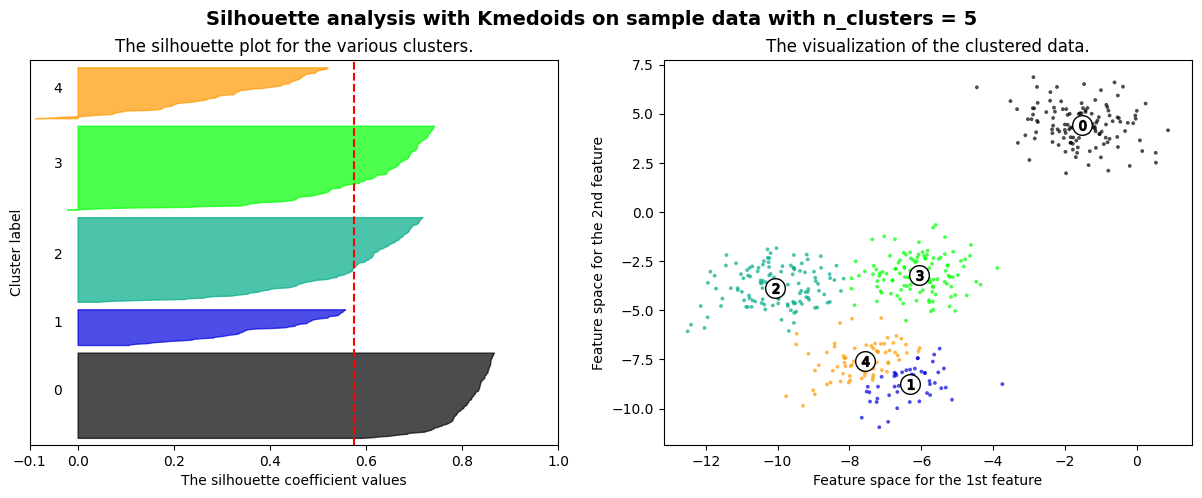

In [17]:
k_medoids_score = sihouette(kmedoids,X,range_n_clusters,'Kmedoids')

### d. What number of K got the best silhouette score? What can you say about the figures? Is this the expected result?

In [18]:
#Best cluster for kmeans
best_score = max(k_means_score, key=k_means_score.get)
print(f'The best silhouette score for kmeans is {round(k_means_score[best_score],3)} and correspond to {best_score} clusters')


The best silhouette score for kmeans is 0.705 and correspond to 2 clusters


In [19]:
#Best cluster for kmedoids
best_score = max(k_medoids_score, key=k_medoids_score.get)
print(f'The best silhouette score for kmeans is {round(k_medoids_score[best_score],3)} and correspond to {best_score} clusters')

The best silhouette score for kmeans is 0.705 and correspond to 2 clusters


Si bien inicialmente se observan 4 grupos de datos o clusters, la cercania que tienen algunos de ellos, impactan negativamente en la separabilidad entre clusters, recordemos que de las metricas que se evaluan en las siluetas, es tanto el promedio de la distancia entre puntos del cluster (intra-cluster) como el promedio de la distancia entre un punto de un cluster a su cluster vecino (inter-cluster), este ultimo componente siendo la separabilidad entre cluster, y como se pudo observar, a mayor numero de cluster se obtiene una peor separabilidad y por ende un metrica mas baja. Por lo tanto el resultado de 2 cluster era el resultado esperado para los datos.

## Punto 6. Use the following code snippet to create different types of scattered data:

In [20]:
#Modules
import numpy as np
from sklearn import cluster, datasets, mixture

In [21]:
"""
Generate datasets. We choose the size big enough to see the scalability
of the algorithms, but not too big to avoid too long running times
"""
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

### a. Plot the different datasets in separate figures. What can you say about them?

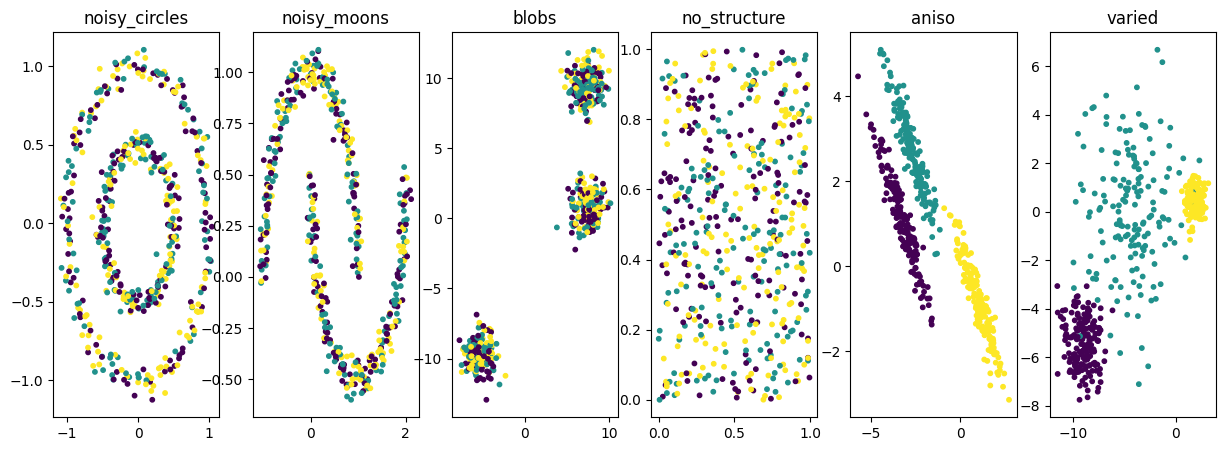

In [22]:
datasets = [noisy_circles,noisy_moons,blobs,no_structure,aniso,varied]
names    = ['noisy_circles','noisy_moons','blobs','no_structure','aniso','varied']
i=0
plt.figure(figsize=(15,5))
for i in range(len(datasets)):
    X,classes = datasets[i]
    plt.subplot(1,6,i+1)
    plt.title(names[i])
    plt.scatter(X[:,0],X[:,1],c=y, cmap='viridis', s=10)
plt.show()

En los diferentes data set se puede observar diferentes distribuciones, en algunos podemos observar patrones circulares, patrones de medialuna, algunos puntos concentrados, otras puntos sin distribución alguna, algunas lineas y por ultimo algunos grupos con datos esparcidos, si tratamos de buscar algun cluster en los diferentes dataset, en los cuales se tienen alguna nube de puntos cercana se puede esperar que los diferentes algoritmos de clusterización arrojen estos conjuntos de datos como un cluster, tal como se ve en el data set blob y en el variado, estas nubes de puntos tienen formas mas circulares, por lo tanto los algoritmos kmeans y k medoids serian de utilidad a la hora de obtener los cluster asociados.
Para los dataset de circulos y lunas, al no tener regiones circulares donde el cálculo de los centroides sea mas sencillo se espera que los cluster no esten mejor definidos que con el analisis espectral.

### b. Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each dataset and compare the results of each algorithm with respect to each dataset.

In [23]:
#Required modules

#Scikit learn clusters
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn_extra.cluster import KMedoids

In [24]:
#Number of cluster
clusters = 3 #Selected without criteria

In [25]:
sck_kmeans   = KMeans(n_clusters=clusters, random_state=0, n_init="auto")
sck_kmedoids = KMedoids(n_clusters=clusters, random_state=0)
sck_dbscan   = DBSCAN(eps=0.5, min_samples=5)
sck_spectral = SpectralClustering(n_clusters=clusters,assign_labels='discretize',
                                  random_state=0)

methods      = [sck_kmeans,sck_kmedoids,sck_dbscan,sck_spectral]
method_names = ['Sklearn Kmeans','Sklearn Kmedoids','Sklearn DBSCAN','Sklearn Spectral Clustering']

In [26]:
#Plotting function for each technique 
def skicit_techinques_plots(methods,X,method_names,title):
    plt.figure(figsize=(15,5))
    for i in range(len(methods)):
        method = methods[i].fit(X)
        plt.subplot(1,4,i+1)
        plt.title(method_names[i])
        plt.scatter(X[:,0],X[:,1],c=method.labels_, cmap='viridis', s=10)
        plt.suptitle(title)   
    plt.show()

In [27]:
datasets = [noisy_circles,noisy_moons,blobs,no_structure,aniso,varied]
names    = ['noisy_circles','noisy_moons','blobs','no_structure','aniso','varied']

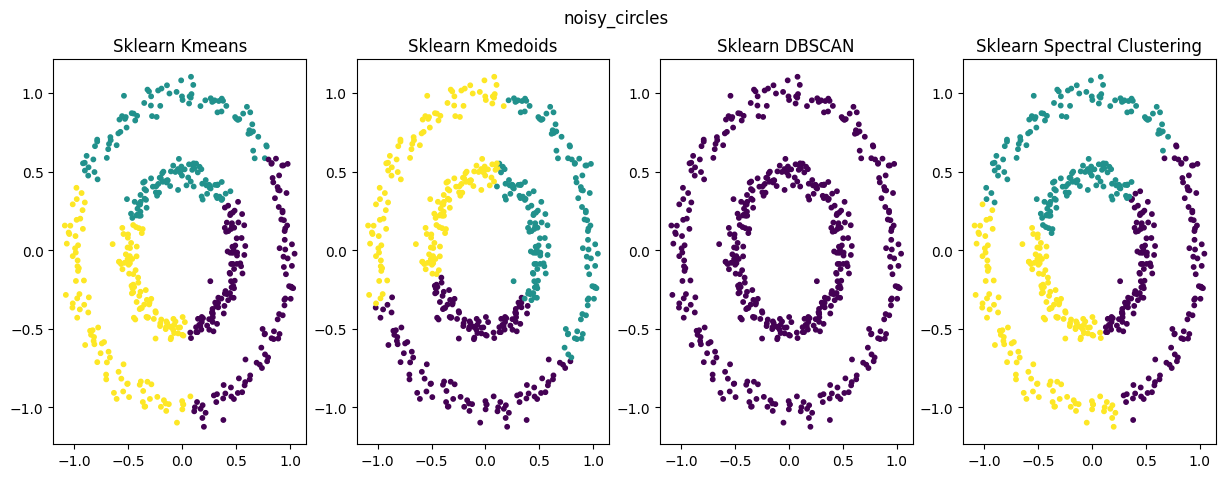

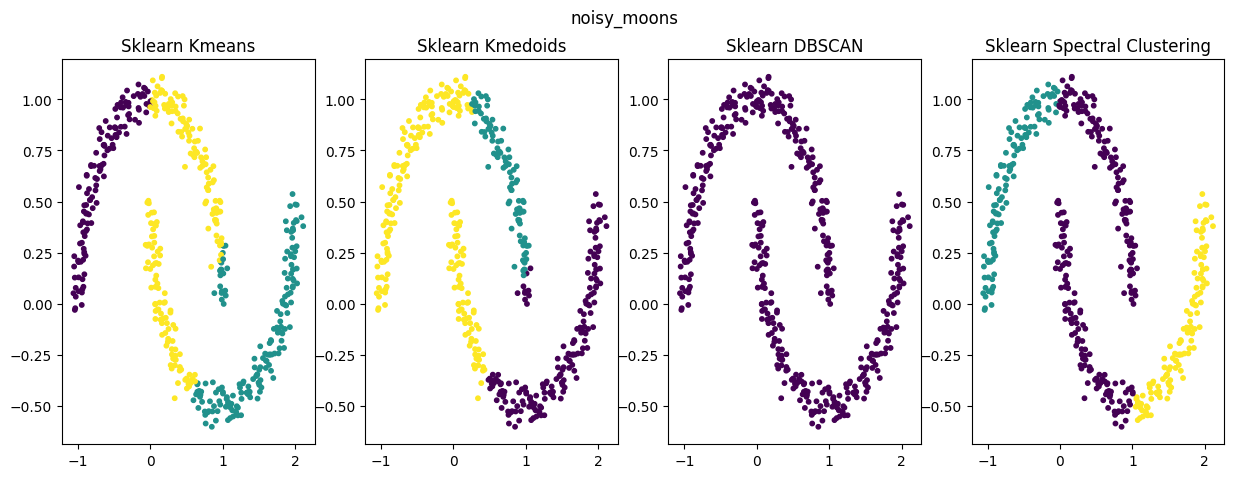

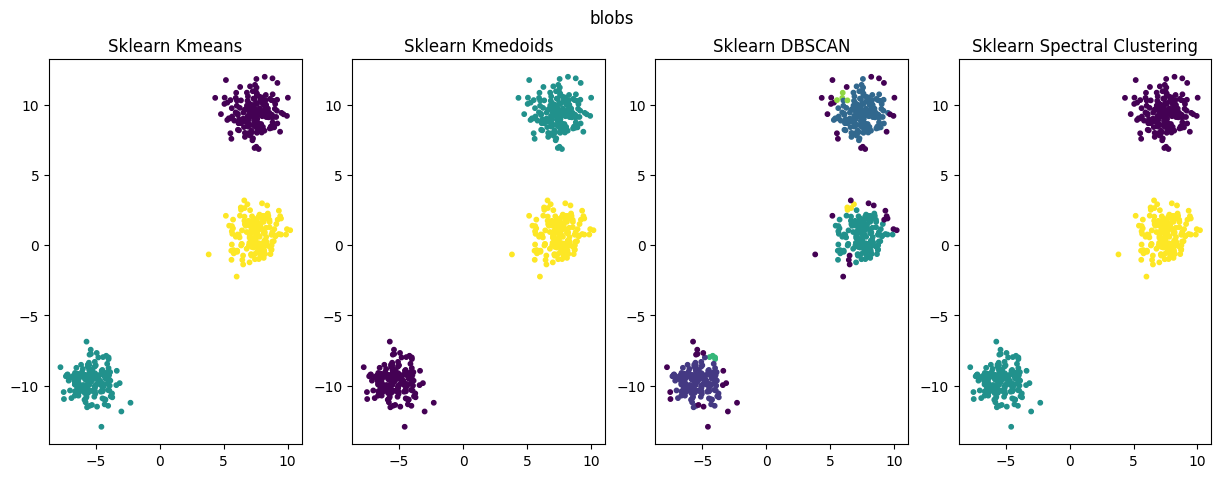

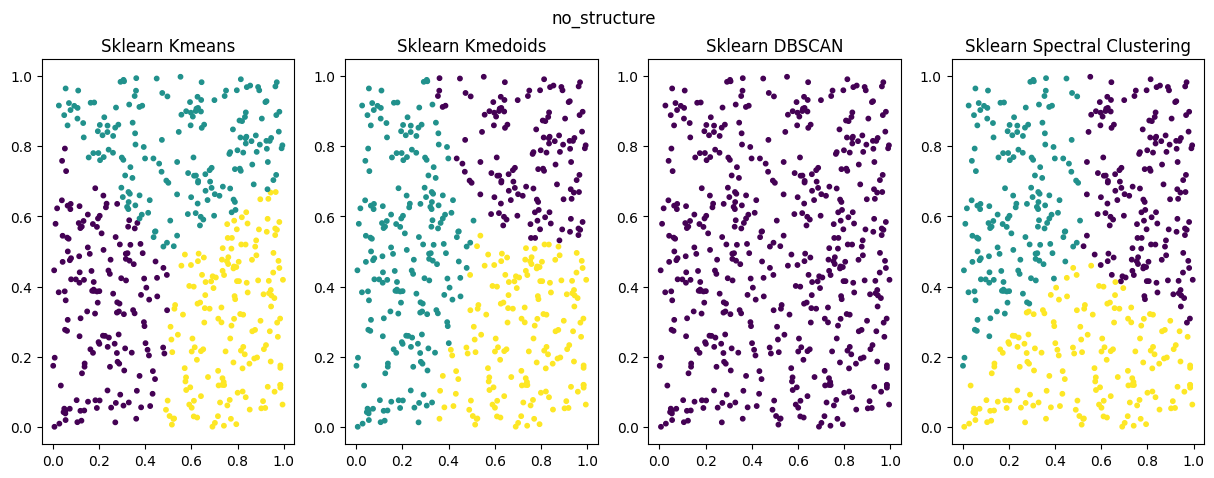

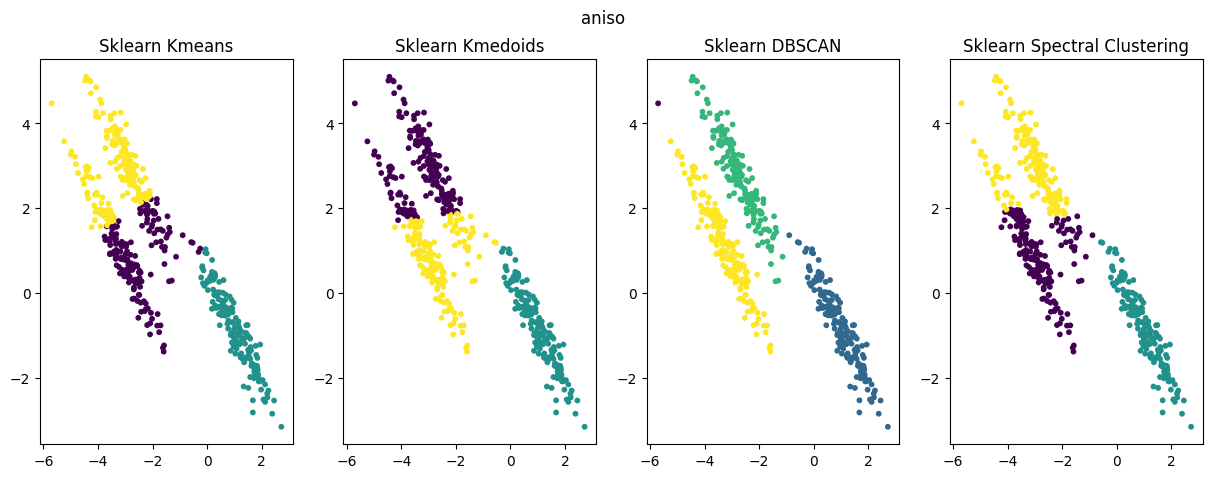

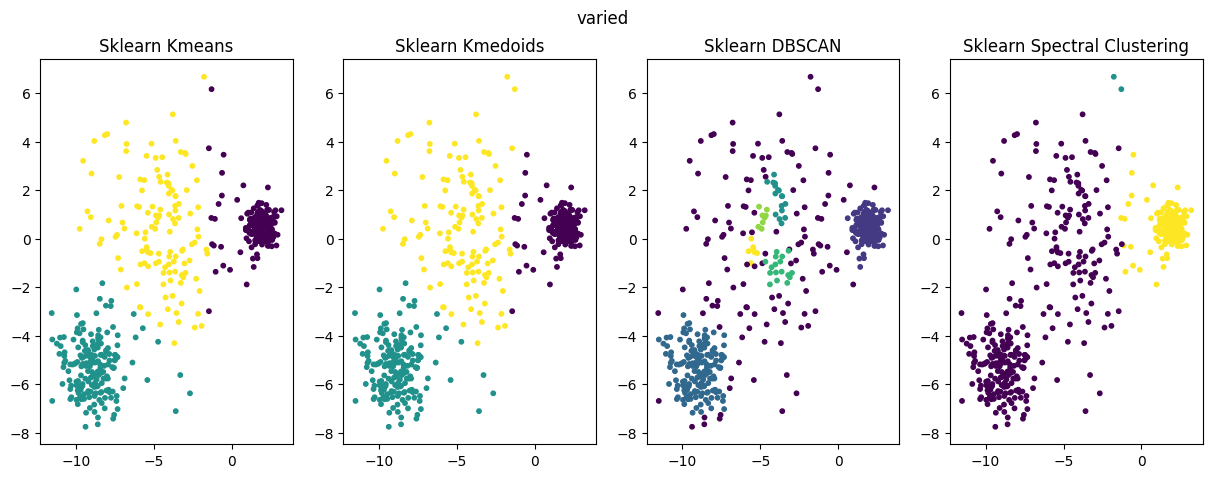

In [28]:
i=0
for i in range(len(datasets)):
    X,classes = datasets[i]
    skicit_techinques_plots(methods,X,method_names,names[i])

El algoritmo DBSCAN presentó inconvenientes a la hora de utilizar los valores por defecto que aparecen en la libreria de la función por lo cual se observa que no se genera un numero adecuado de cluster, se esperaba que a partir del analsis de densidad un cluster por cada circulo o luna, sin embargo, este arrojo como resultado general un solo cluster de ruido.
Se debe resaltar que para las regiones no convexas de los data set lunas y circulos se esperaba un peor comportamiento de los algoritmos kmeans y kmedoids, con respecto al clustering espectral, sin embargo, este no fue el caso, la distribución de la data no es tan diferente entre las tecnicas, pero si se obseva mejor separabilidad en el clustering espectral, valdria la pena obtener los resultados de los coeficientes de silueta de dichos cluster con el fin de conocer cual de los algoritmos nos arroja el mejor resultado.
